# House Grade Classification
Classifying the Grades of various houses present into the Test dataset considering multiple features

# Data Pre-Processing on training data

In [1]:
# =============================================================================
# Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") # It will ignore the warnings
# =============================================================================

# =============================================================================
# Importing Data
train = pd.read_csv("D:/PGDA Files/Python/Project/House Grade/TRAINING.csv")
train.columns
# =============================================================================

# =============================================================================
# Replacing No=0 and Yes = 1 for easy calculations
train.at[train['roof']=='no', 'roof'] = 0
train.at[train['roof']=='yes', 'roof'] = 1
train.at[train['roof']=='NO', 'roof'] = 0
train.at[train['roof']=='YES', 'roof'] = 1
# =============================================================================

# =============================================================================
# We are converting it into factorized levels 
train['Grade'], _ = pd.factorize(train['Grade'], sort=True)
train['roof'], _ = pd.factorize(train['roof'], sort=True)
# We have replaced -1 with nan because it was actually nan but while factorizing it was converted to -1
train['roof']=train['roof'].replace(-1, np.nan) 
# =============================================================================

# =============================================================================
# To find out missing values from dataset
# It will show the number of missing values in every individual column
train.isna().sum() 
# =============================================================================

# =============================================================================
# Dealing with missing values in training data
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1, weights="uniform")
train=imputer.fit_transform(train)
# =============================================================================

# =============================================================================
# Convering array to dataframe
train = pd.DataFrame(train)
# =============================================================================

# =============================================================================
# Assigning the column names as per it's index values
train.columns = ['id', 'Area(total)', 'Troom', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB', 'Grade',
       'EXPECTED']
# =============================================================================

# =============================================================================
# We'll be dropping roof columns as it is not needed because the roof area get's the job done
train=train.drop(columns=['roof'])
# =============================================================================


# Data Pre-Processing on Testing Data 

In [2]:
# =============================================================================
# Libraries
import pandas as pd
import numpy as np
# =============================================================================

# =============================================================================
# Importing Data
test = pd.read_csv("D:/PGDA Files/Python/Project/House Grade/TEST.csv")
test.columns
# =============================================================================

# =============================================================================
# Replacing No=0 and Yes = 1 for easy calculations
test.at[test['roof']=='no', 'roof'] = 0
test.at[test['roof']=='yes', 'roof'] = 1
test.at[test['roof']=='NO', 'roof'] = 0
test.at[test['roof']=='YES', 'roof'] = 1
# =============================================================================

# =============================================================================
# We are converting it into factorized levels 
test['roof'], _ = pd.factorize(test['roof'], sort=True)
# We have replaced -1 with nan because it was actually nan but while factorizing it was converted to -1
test['roof']=test['roof'].replace(-1, np.nan) 
# =============================================================================

# =============================================================================
# To find out missing values from dataset
# It will show the number of missing values in every individual column
test.isna().sum() 
# =============================================================================

# =============================================================================
# Dealing with missing values in testing data
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1, weights="uniform")
test=imputer.fit_transform(test)
# =============================================================================

# =============================================================================
# Convering array to dataframe
test = pd.DataFrame(test)
# =============================================================================

# =============================================================================
# Assigning the column names as per it's index values
test.columns = ['id', 'Area(total)', 'Troom', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB', 
       'EXPECTED']
# =============================================================================

# =============================================================================
# We'll be dropping roof columns as it is not needed because the roof area get's the job done
test=test.drop(columns=['roof'])
# =============================================================================

# Seperating Independant and dependant variables

In [3]:
x = train.iloc[:,[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12]].values # Without Id Column
y = train.iloc[:,-2].values #Dependant variable

# InDependant Variables in test dataset adn we'll be predicting the Dependant Variable i.e. Grade of Houses
test= test.iloc[:,[1,2,3,4,5,6,7,8,9,10,11]]# Without Id Column

# Building Various Classification models

# 1. KNN Classifier

Accuracy for KNN Classification:  0.741


Text(0.5, 1.0, 'House Grade Classification using KNN Classification With Respect to Expected Price and Total Area')

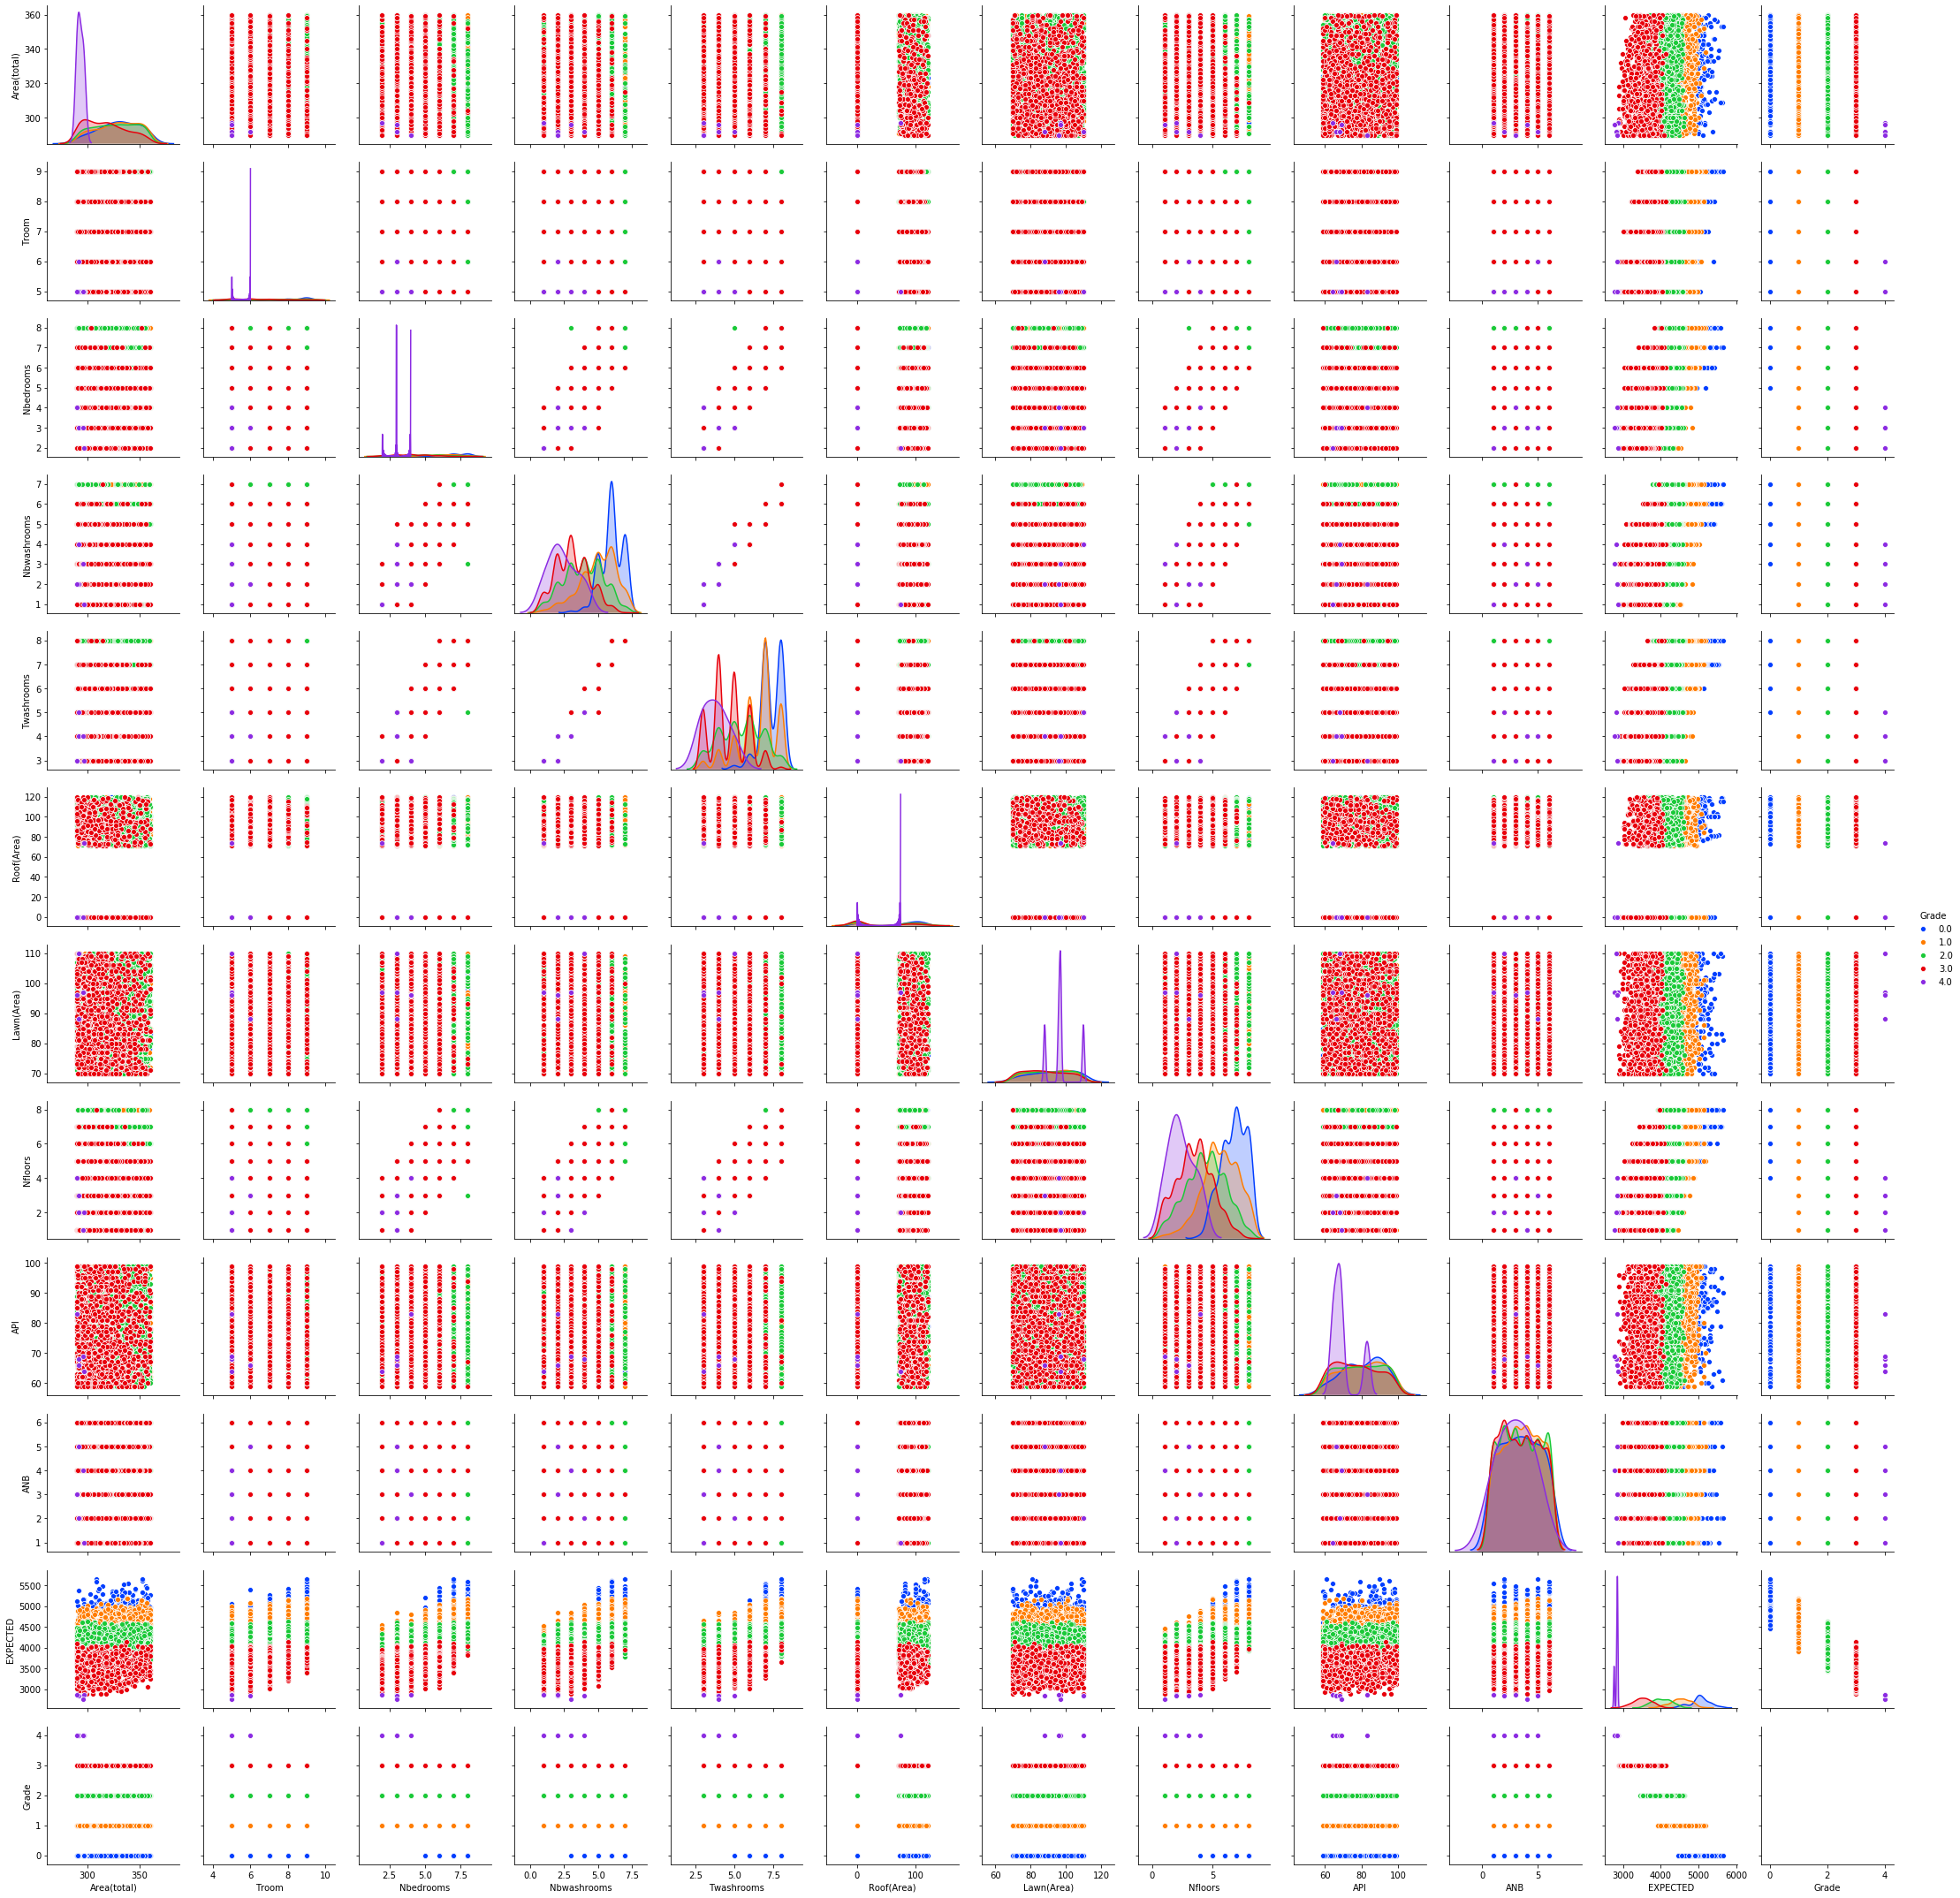

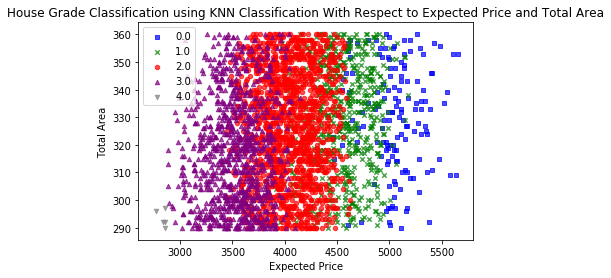

In [4]:
# =============================================================================
# Fitting KNN Classifier to the training dataset
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(x,y)
# =============================================================================

# =============================================================================
# Accuracy of KNN Classification on Training Data
knn_score=knn_clf.score(x,y)
print("Accuracy for KNN Classification: " ,knn_score)
# =============================================================================

# =============================================================================
# Predicting grade values in testing data with respect to the KNN classifier
y_pred_knn = knn_clf.predict(test)
# =============================================================================

# =============================================================================
# Creating seperate dataframe
test_knn=test.copy(deep=True)
test_knn['Grade'] = y_pred_knn #Creating new GRADE Column in test dataset
# =============================================================================

# =============================================================================
# Visualizing
import seaborn as sns
sns.pairplot(test_knn, hue="Grade",palette="bright")

import matplotlib.pyplot as plt
from mlxtend.plotting import category_scatter

fig = category_scatter(x='EXPECTED', y='Area(total)', label_col='Grade', data=test_knn, legend_loc='upper left')
                       
plt.xlabel('Expected Price')
plt.ylabel("Total Area")
plt.title("House Grade Classification using KNN Classification With Respect to Expected Price and Total Area")
# =============================================================================

# 2. SVM Classifier

Accuracy for SVM Classification:  0.8804285714285714


Text(0.5, 1.0, 'House Grade Classification using SVM With Respect to Expected Price and Total Area')

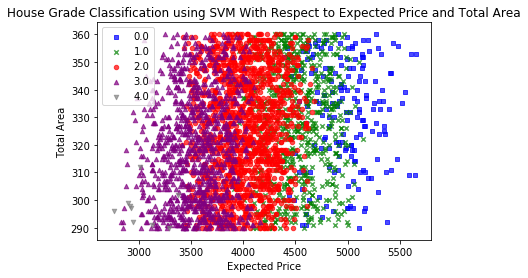

In [5]:
# =============================================================================
# Fitting SVM Classifier to the training dataset
from sklearn.svm import SVC
clf = SVC(kernel='linear',gamma='auto')
clf.fit(x,y)
# =============================================================================

# =============================================================================
# Accuracy of SVM Classification on training data
SVM_Accuracy=clf.score(x,y)
print("Accuracy for SVM Classification: ",SVM_Accuracy)
# =============================================================================

# =============================================================================
# Predicting the Grade Values in testing data on the basis of SVM classification
y_pred_SV = clf.predict(test)
# =============================================================================

# =============================================================================
# Creating seperate dataframe
test_sv=test.copy(deep=True)
test_sv['Grade'] = y_pred_SV #Creating new GRADE Column in test dataset
# =============================================================================

# =============================================================================
# Visualization 
import matplotlib.pyplot as plt
from mlxtend.plotting import category_scatter

fig = category_scatter(x='EXPECTED', y='Area(total)', label_col='Grade', data=test_sv, legend_loc='upper left')
                       
plt.xlabel('Expected Price')
plt.ylabel("Total Area")
plt.title("House Grade Classification using SVM With Respect to Expected Price and Total Area")
# =============================================================================

# 3. Logistic Regression Classifier

Accuracy for Logistic Regression Classifier:  0.5668571428571428


Text(0.5, 1.0, 'House Grade Classification using Logistic Regression With Respect to Expected Price and Total Area')

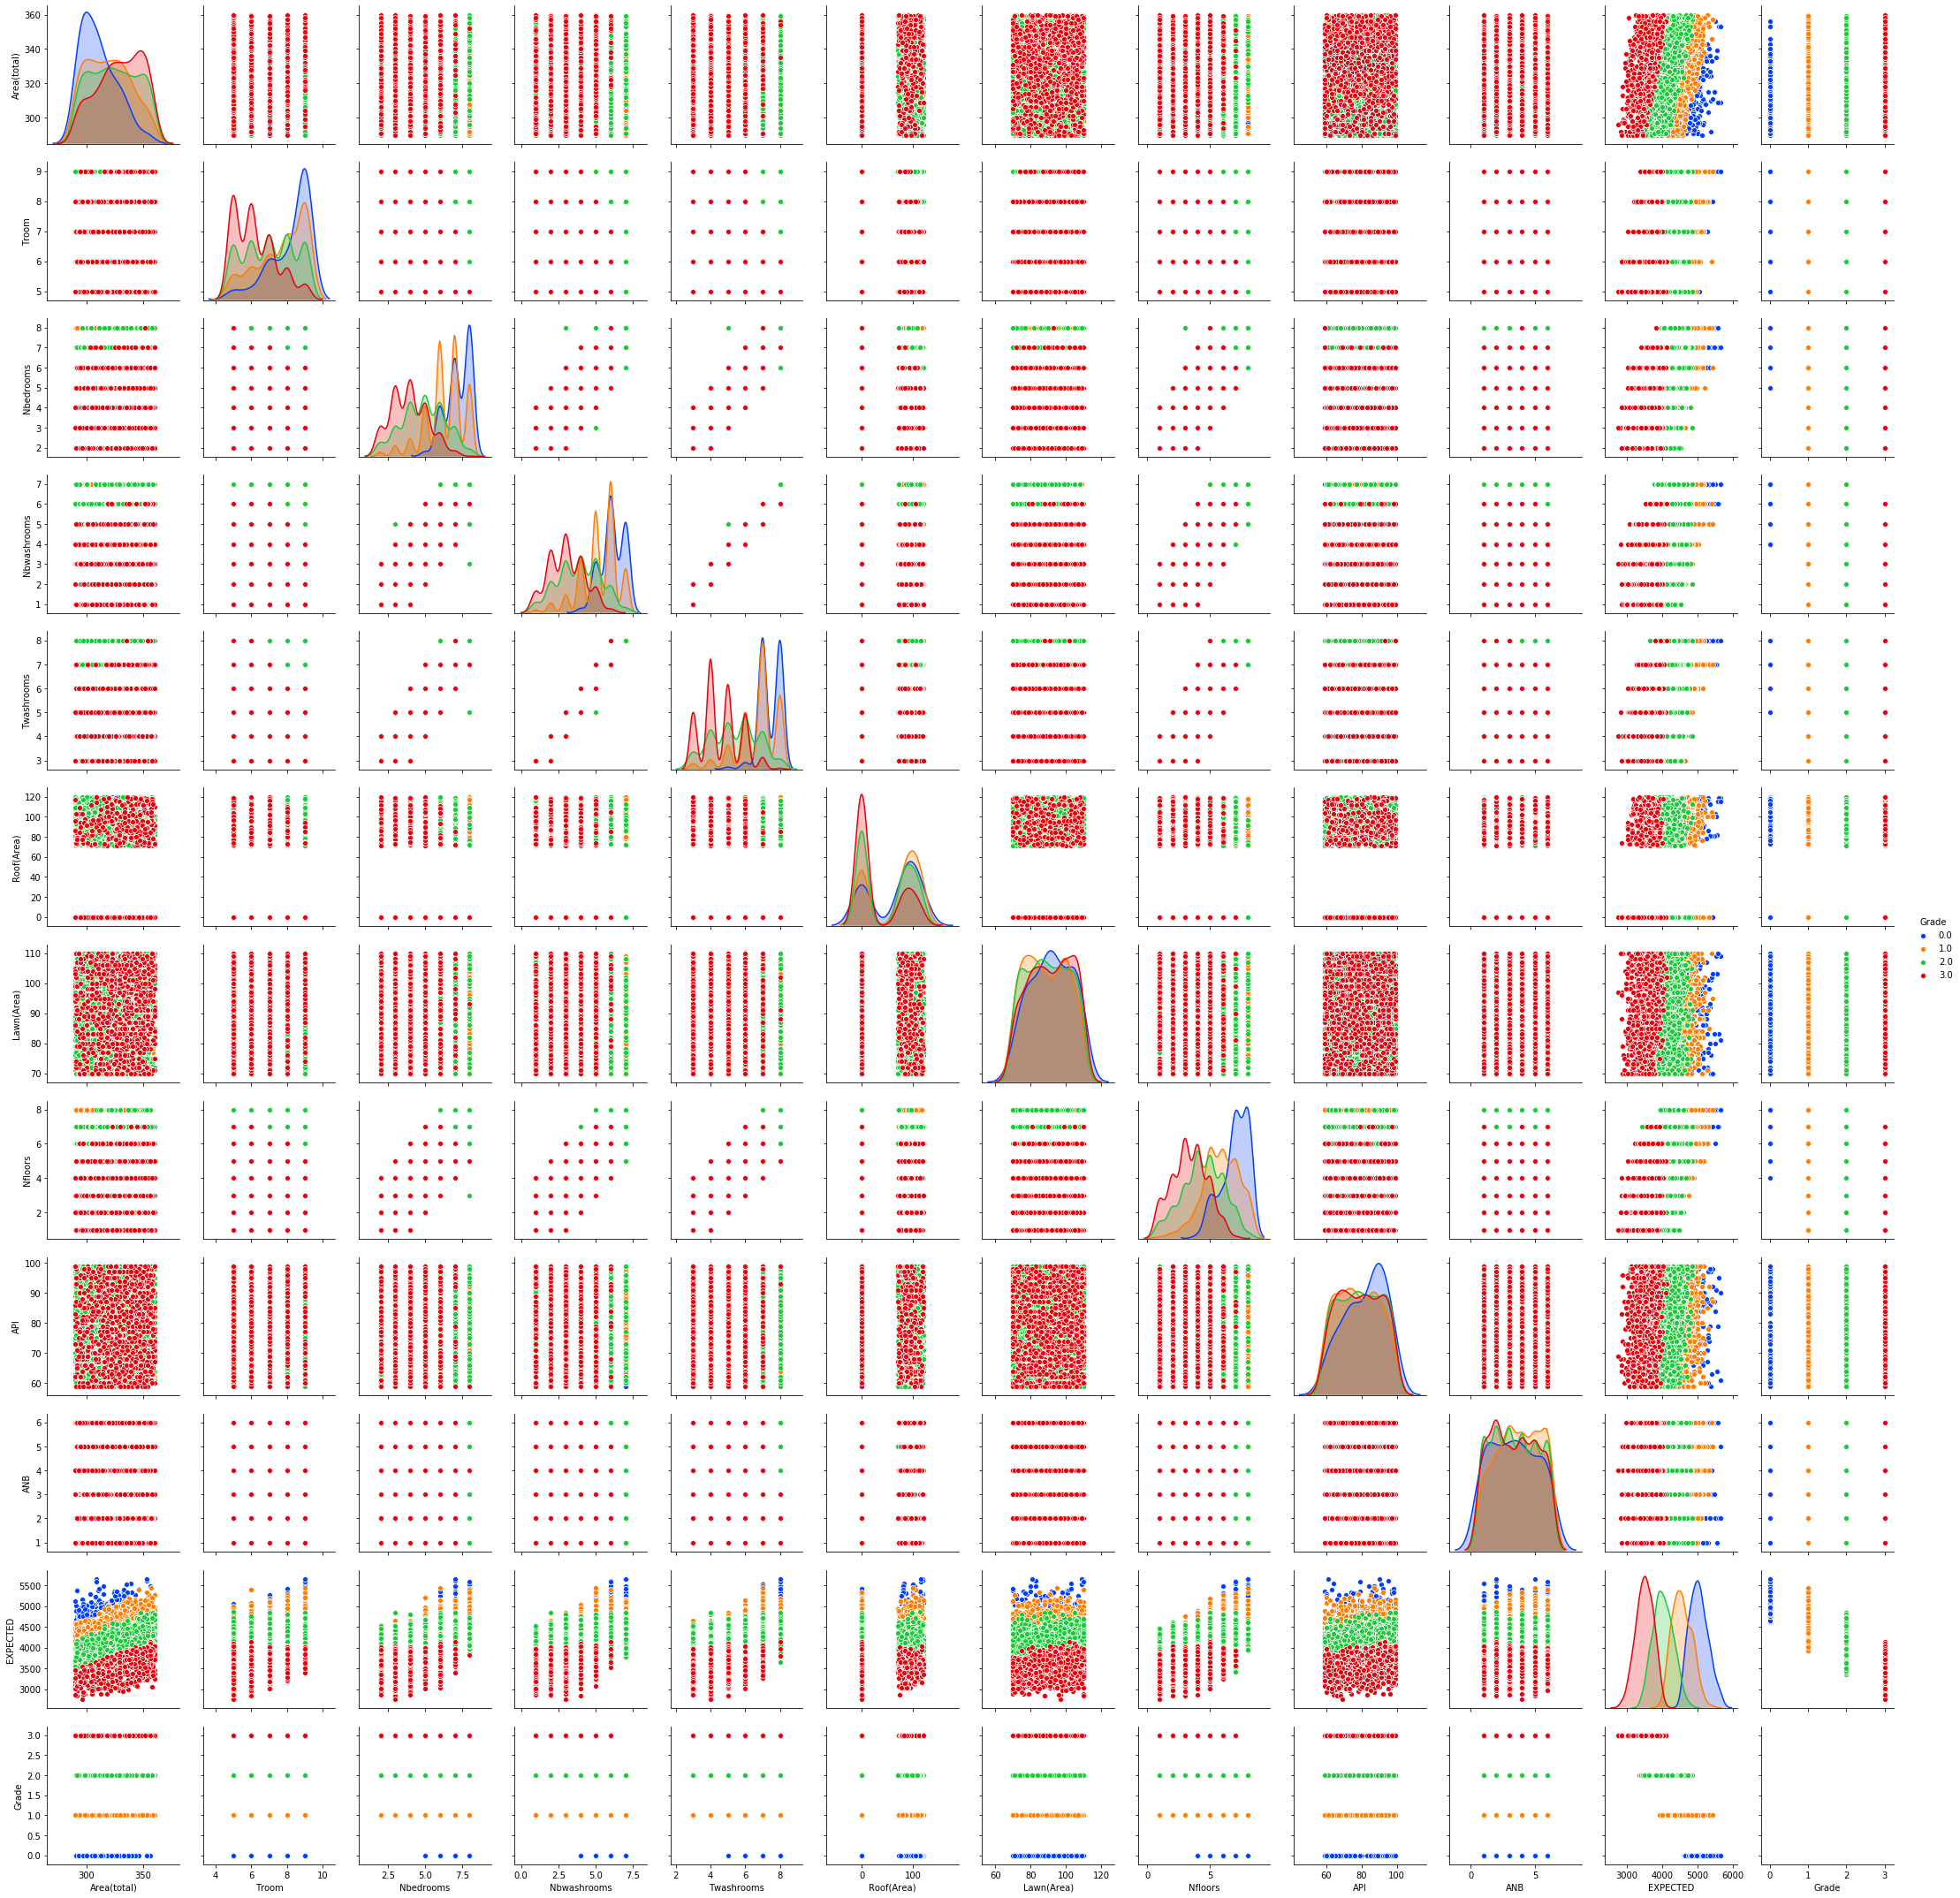

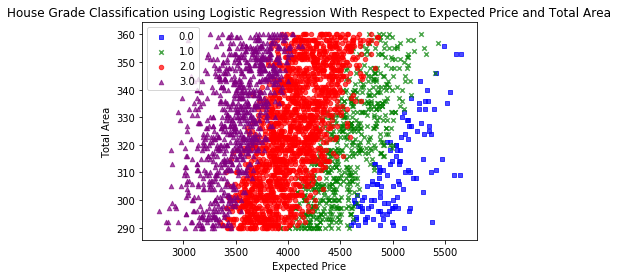

In [6]:
# =============================================================================
# Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x,y)
# =============================================================================

# =============================================================================
# Accuracy of Logistic Regression Classifier on training data
LR_SCORE=classifier.score(x,y)
print("Accuracy for Logistic Regression Classifier: ",LR_SCORE)
# =============================================================================

# =============================================================================
# Predicting the Grade Values in testing data on the basis of Logistic Regression Classifier
y_pred_lr = classifier.predict(test)
# =============================================================================

# =============================================================================
# Creating seperate dataframe
test_lr=test.copy(deep=True)
test_lr['Grade'] = y_pred_lr #Creating new GRADE Column in test dataset
# =============================================================================

# =============================================================================
# Visualizing
import seaborn as sns
sns.pairplot(test_lr, hue="Grade",palette="bright")

import matplotlib.pyplot as plt
from mlxtend.plotting import category_scatter

fig = category_scatter(x='EXPECTED', y='Area(total)', label_col='Grade', data=test_lr, legend_loc='upper left')
                       
plt.xlabel('Expected Price')
plt.ylabel("Total Area")
plt.title("House Grade Classification using Logistic Regression With Respect to Expected Price and Total Area")
# =============================================================================

# 3. Decision Tree Classifier

Accuracy for Decision Tree Classification:  1.0


Text(0.5, 1.0, 'House Grade Classification using Decision Tree  With Respect to Expected Price and Total Area')

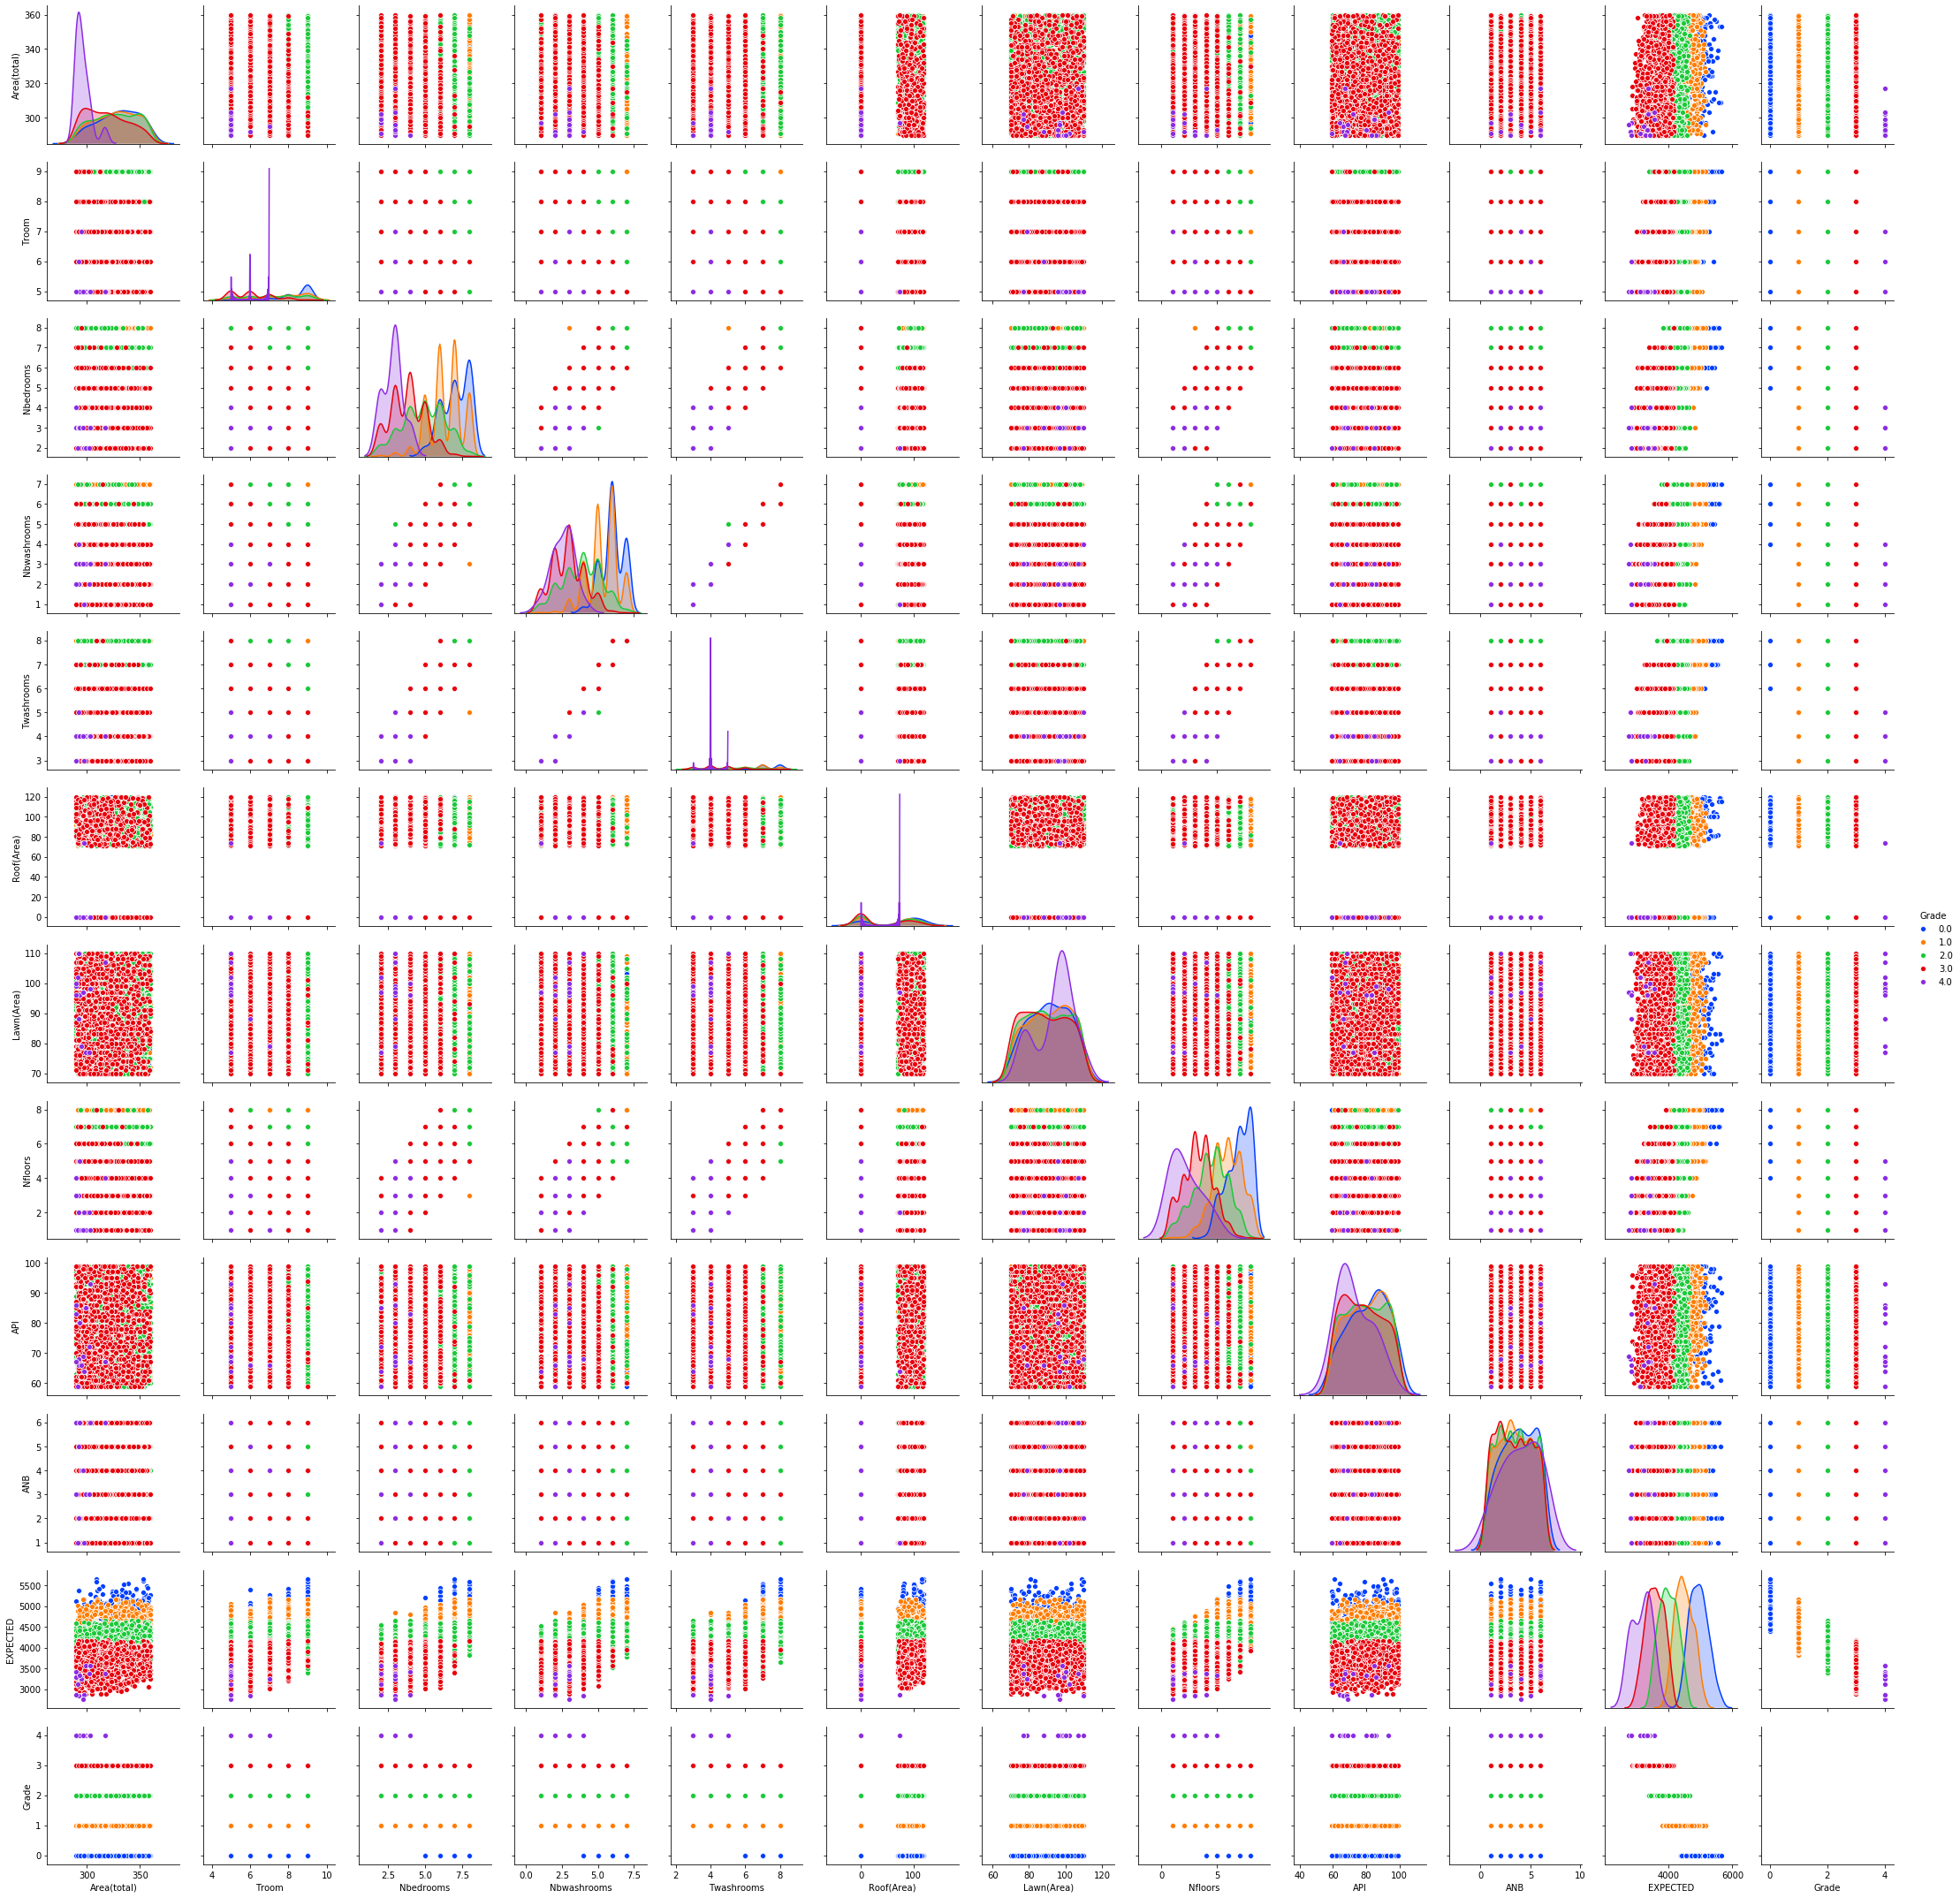

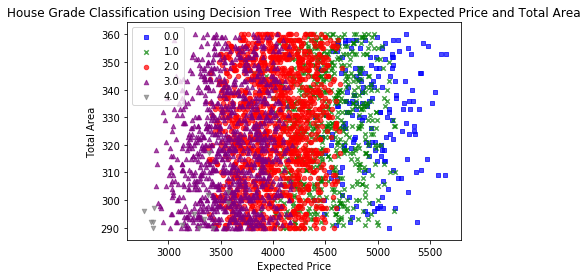

In [7]:
# =============================================================================
# Fitting Decision Tree classifier on to the training dataset
from sklearn.tree import DecisionTreeClassifier
Dtree = DecisionTreeClassifier(criterion='entropy', random_state=0)
Dtree.fit(x, y)
# =============================================================================

# =============================================================================
# Accuracy of Decision Tree Classification on training data
Dtree_score=Dtree.score(x, y)
print("Accuracy for Decision Tree Classification: ",Dtree_score)
# =============================================================================

# =============================================================================
# Predicting grade values in testing data with respect to the decision tree classifier
y_pred_DT = Dtree.predict(test)
# =============================================================================

# =============================================================================
# Creating seperate dataframe
test_dt=test.copy(deep=True)
test_dt['Grade'] = y_pred_DT #Creating new GRADE Column in test dataset
# =============================================================================

# =============================================================================
# Visualizing
import seaborn as sns
sns.pairplot(test_dt, hue="Grade",palette="bright")

import matplotlib.pyplot as plt
from mlxtend.plotting import category_scatter

fig = category_scatter(x='EXPECTED', y='Area(total)', label_col='Grade', data=test_dt, legend_loc='upper left')
                       
plt.xlabel('Expected Price')
plt.ylabel("Total Area")
plt.title("House Grade Classification using Decision Tree  With Respect to Expected Price and Total Area")
# =============================================================================

# 4. Naive Bayes Classifier

Accuracy for Naive Bayes Classification:  0.735


Text(0.5, 1.0, 'House Grade Classification using Naive Bayes With Respect to Expected Price and Total Area')

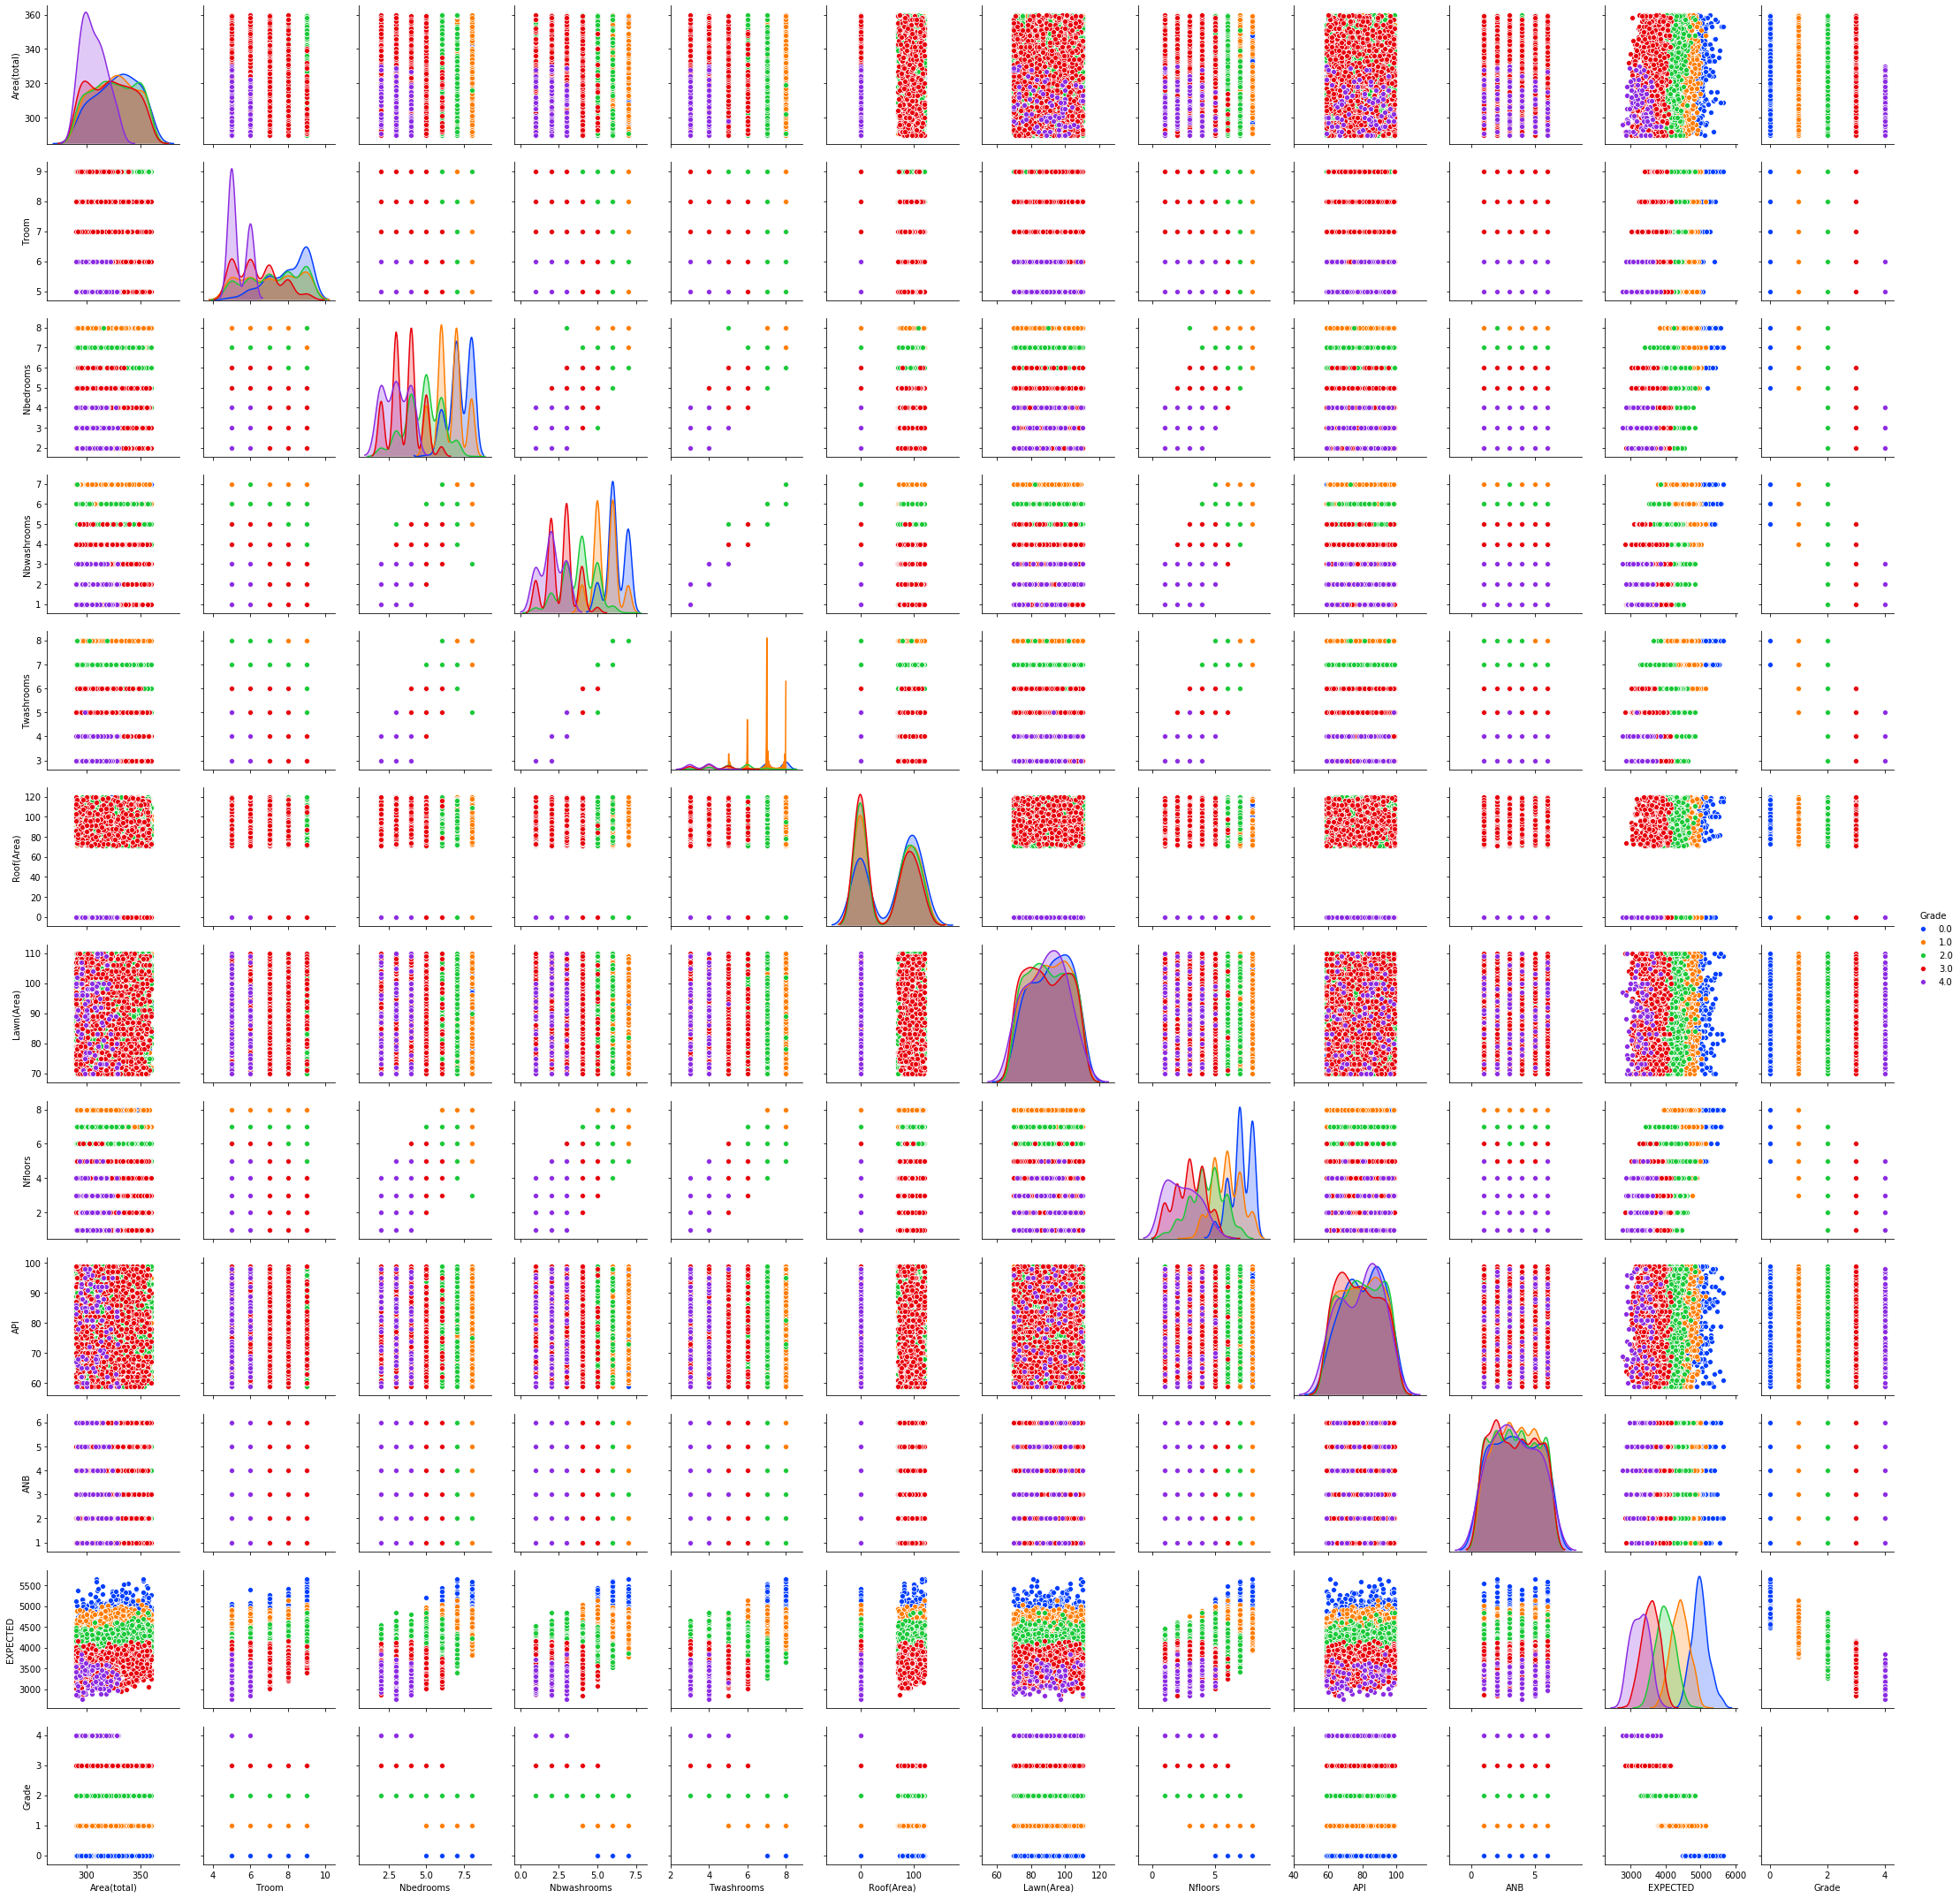

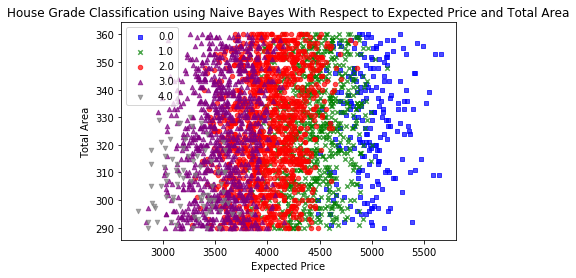

In [8]:
# =============================================================================
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
NBclassifier = GaussianNB()
NBclassifier.fit(x,y)
# =============================================================================

# =============================================================================
# Accuracy of Naive Bayes Classification on training data
NB_Score=NBclassifier.score(x, y)
print("Accuracy for Naive Bayes Classification: ",NB_Score)
# =============================================================================

# =============================================================================
# Predicting grade values in testing data with respect to the Naive Bayes classifier
y_pred_NB = NBclassifier.predict(test)
# =============================================================================

# =============================================================================
# Creating seperate dataframe
test_nb=test.copy(deep=True)
test_nb['Grade'] = y_pred_NB #Creating new GRADE Column in test dataset
# =============================================================================

# =============================================================================
# Visualizing
import seaborn as sns
sns.pairplot(test_nb, hue='Grade',palette="bright")

import matplotlib.pyplot as plt
from mlxtend.plotting import category_scatter

fig = category_scatter(x='EXPECTED', y='Area(total)', label_col='Grade', data=test_nb, legend_loc='upper left')
                       
plt.xlabel('Expected Price')
plt.ylabel("Total Area")
plt.title("House Grade Classification using Naive Bayes With Respect to Expected Price and Total Area")
# =============================================================================

# 5. Random Forest Classifier

Accuracy for Random Forest Classificaton:  0.9937142857142857


Text(0.5, 1.0, 'House Grade Classification using Random Forest With Respect to Expected Price and Total Area')

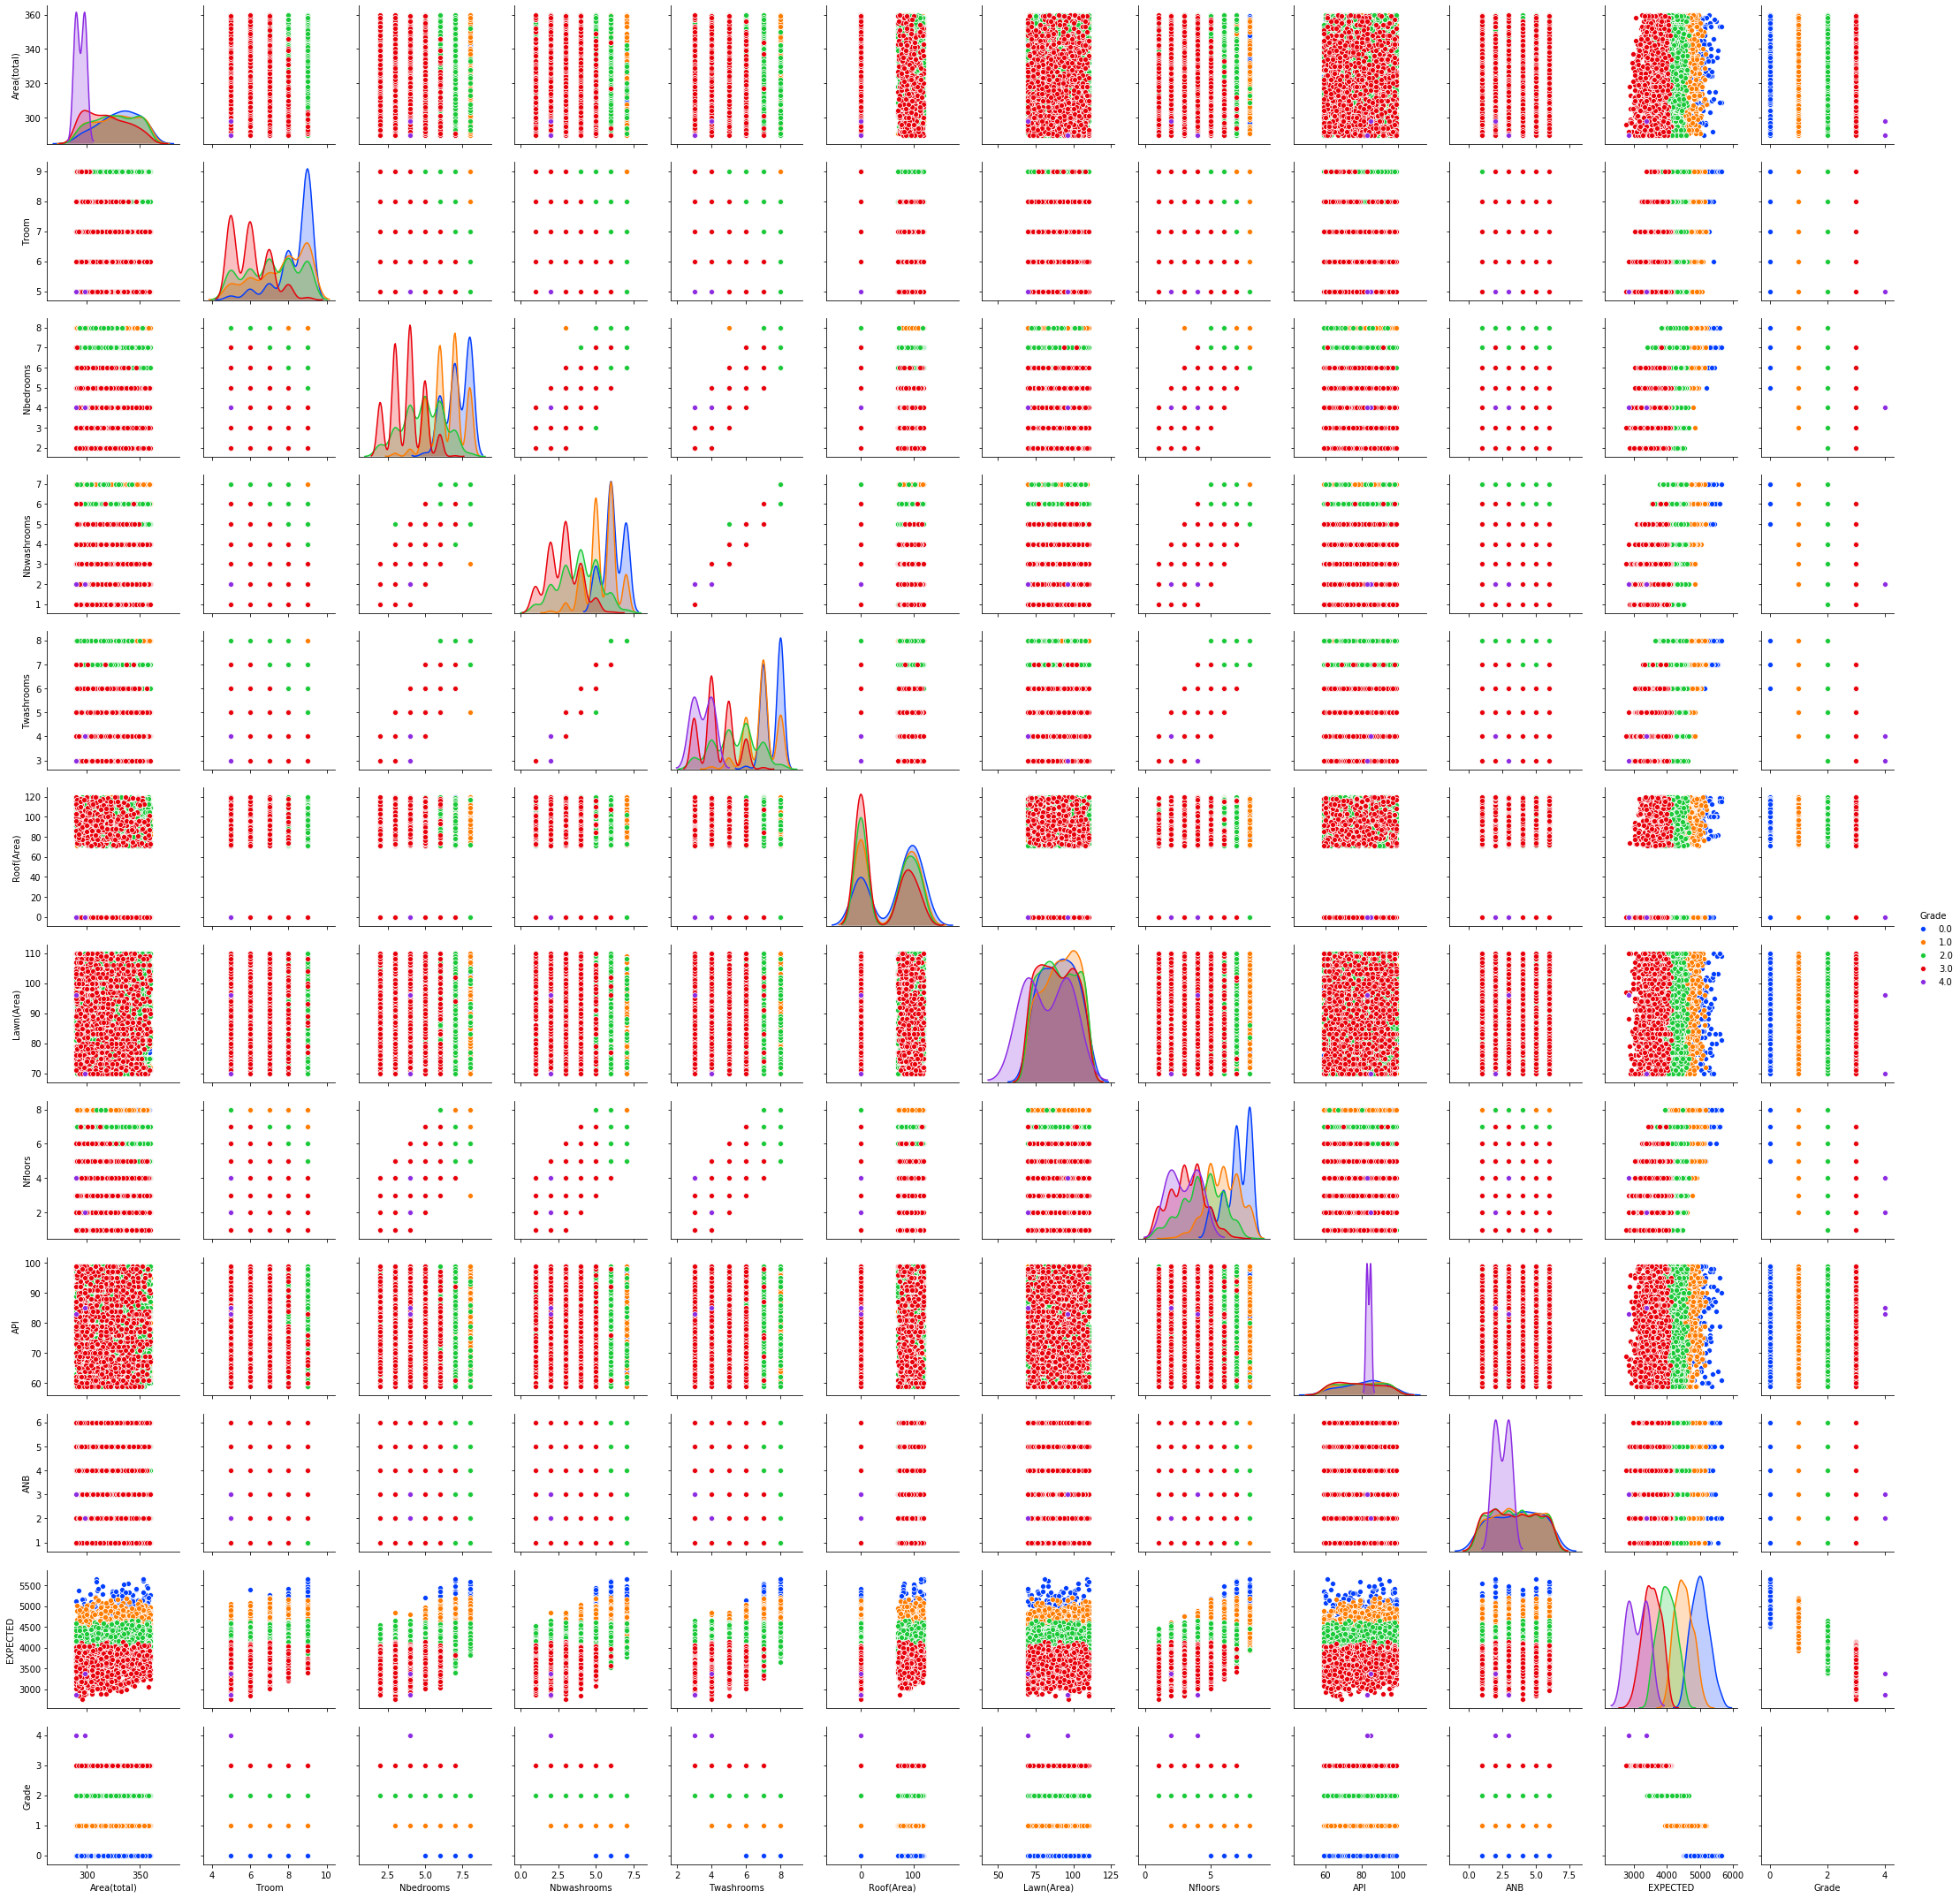

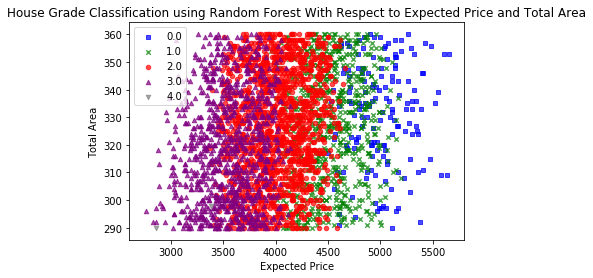

In [9]:
# =============================================================================
# Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier_rf.fit(x,y)
# =============================================================================

# =============================================================================
# Accuracy of Random Forest on Training Data
RF_score=classifier_rf.score(x,y)
print("Accuracy for Random Forest Classificaton: ",RF_score)
# =============================================================================

# =============================================================================
# Predicting grade values in testing data with respect to the Naive Bayes classifier
y_pred_RF = classifier_rf.predict(test)
# =============================================================================

# =============================================================================
# Creating seperate dataframe
test_rf=test.copy(deep=True)
test_rf['Grade'] = y_pred_RF #Creating new GRADE Column in test dataset
# =============================================================================

# =============================================================================
# Visualizing
import seaborn as sns
sns.pairplot(test_rf, hue="Grade",palette="bright")

import matplotlib.pyplot as plt
from mlxtend.plotting import category_scatter

fig = category_scatter(x='EXPECTED', y='Area(total)', label_col='Grade', data=test_rf, legend_loc='upper left')
                       
plt.xlabel('Expected Price')
plt.ylabel("Total Area")
plt.title("House Grade Classification using Random Forest With Respect to Expected Price and Total Area")
# =============================================================================